In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt
import os
os.environ["DJANGO_SETTINGS_MODULE"] = "analyzer.settings"
import sys
import django
django.setup()

In [2]:
import datetime
from datetime import timedelta

In [3]:
import pickle

In [4]:
# pickleからデータを開く
with open('kampo_list.pickle', mode='rb') as f:
    keme = pickle.load(f)
# group.name, user_count, start_day, user.username, steps, distance, kampo, step1, step2, ... , step10

In [5]:
mikan_data = keme[np.where( keme[:, 6] == False ), 7:17].copy()
kampo_data = keme[np.where( keme[:, 6] == True ), 7:17].copy()
mikan_data = mikan_data[0, ]
kampo_data = kampo_data[0, ]

In [6]:
import scipy
from scipy import cluster

In [261]:
sep_data = keme[np.where( keme[:, 2] == datetime.date(2015, 9, 11) ), 7:17].copy()
sep_data = sep_data[0, ]

oct_data = keme[np.where( keme[:, 2] == datetime.date(2015, 10, 6) ), 7:17].copy()
oct_data = oct_data[0, ]

nov_data = keme[np.where( keme[:, 2] == datetime.date(2015, 11, 1) ), 7:17].copy()
nov_data = nov_data[0, ]

In [262]:
# それぞれ ゼロばっかりの記録の人を除く
print sep_data.shape, oct_data.shape, nov_data.shape

rows = np.array([])
for i in range(len(sep_data)):
    if sum(sep_data[i]) == 0.0:
        rows = np.append( rows, i )
sep_data = np.delete( sep_data, rows, 0 )

rows = np.array([])
for i in range(len(oct_data)):
    if sum(oct_data[i]) == 0.0:
        rows = np.append( rows, i )
oct_data = np.delete( oct_data, rows, 0 )

rows = np.array([])
for i in range(len(nov_data)):
    if sum(nov_data[i]) == 0.0:
        rows = np.append( rows, i )
nov_data = np.delete( nov_data, rows, 0 )

print sep_data.shape, oct_data.shape, nov_data.shape

(189, 10) (388, 10) (460, 10)
(127, 10) (259, 10) (318, 10)


# ベクトル量子化してみよう！

In [20]:
# ここ不要!!!!!!!!!!!!!!!!!!!!!!!
keme_vq = keme[:, 7:17].copy()
# data = data.reshape((1, 10*len(data)))
keme_vq = np.array(keme_vq).astype(np.float32)
# データをクラスタリング
N = 8
codebook, destortion = scipy.cluster.vq.kmeans(keme_vq, N, iter=20, thresh=1e-05)
print codebook
# print destortion

# ベクトル量子化
# 各データをセントロイドに分類する
# code, dist = scipy.cluster.vq.vq(keme_vq, codebook)
# print "code: ", np.unique(code)

[[  9340.8984375    6499.57324219   6655.68554688   7021.03369141
    6987.78662109   6406.14599609  13247.12402344   6428.65185547
    4855.02246094   5689.        ]
 [    68.40229797     38.15229797     48.61494064     64.50574493
      30.45402336     33.12356186     33.54310226     46.2902298
      76.96264648     76.18390656]
 [ 21176.15234375  21052.60546875  21153.66601562  18005.69726562
   22069.84765625  19418.30273438  24486.45507812  19964.66601562
   17401.78710938  25339.06054688]
 [  3978.98510742   3981.17773438   4673.27392578   3968.48876953
    4246.84423828   3936.51123047   4877.81494141   3172.14819336
    3690.84448242   4349.39990234]
 [  4989.97167969   5503.02832031   6513.64404297   7287.95458984
    7309.34472656   6881.98876953   5447.86425781   7404.49707031
    7549.94335938   7107.75683594]
 [ 13282.72949219  10505.296875    26430.296875    10903.16210938
    8918.72949219   9022.13476562  13433.296875     9237.45898438
    5839.59472656   6319.08105469]

# あきらめて杉山先生の量子化結果をもらう

In [263]:
codebook = np.array([ 18064.2734375, 6483.97900391, 8558.92480469, 2849.14038086, 
                     11663.4296875, 832.01855469, 33613.1328125, 4715.02880859])
codebook = np.sort(codebook)
print codebook

[   832.01855469   2849.14038086   4715.02880859   6483.97900391
   8558.92480469  11663.4296875   18064.2734375   33613.1328125 ]


In [264]:
# codebookを参照して月ごとのデータを離散化
# 各データをセントロイドに分類する
# ----------9月のデータ-------------#
data = sep_data.copy()
data = data.astype(np.float32)
data.shape = 1270,

sep_code, dist = scipy.cluster.vq.vq(data, codebook)

# print "portion of each code: "
# for i in xrange(8):
#     print "num of [%d]: " % i, np.count_nonzero((sep_code == i))
sep_code.shape = (127, 10)


# ----------10月のデータ-------------#
data = oct_data.copy()
data = data.astype(np.float32)
data.shape = 2590,

oct_code, dist = scipy.cluster.vq.vq(data, codebook)

# print "portion of each code: "
# for i in xrange(8):
#     print "num of [%d]: " % i, np.count_nonzero((oct_code == i))
oct_code.shape = (259, 10)


# ----------11月のデータ-------------#
data = nov_data.copy()
data = data.astype(np.float32)
data.shape = 3180,

nov_code, dist = scipy.cluster.vq.vq(data, codebook)

# print "portion of each code: "
# for i in xrange(8):
#     print "num of [%d]: " % i, np.count_nonzero((nov_code == i))
nov_code.shape = (318, 10)

In [265]:
sep_data = sep_code.copy()
oct_data = oct_code.copy()
nov_data = nov_code.copy()

In [150]:
import pandas
import seaborn

# 天候について解析

In [88]:
# 10日間の天候リスト 降雨ありが1、なしが0
WEATHER = np.array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 
                    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
                    [0, 1, 1, 0, 0, 0, 0, 1, 1, 1]])

### 雨→晴

In [329]:
N = 8
# 雨->晴の場合に切り出し
hoge = np.vstack( [sep_data[:, 6:8],
                  oct_data[:, 3:5],
                  oct_data[:, 5:7],
                  nov_data[:, 2:4]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.2941  0.1961  0.2059  0.0784  0.0882  0.0882  0.0392  0.0098]
 [ 0.1223  0.2014  0.1727  0.1942  0.1151  0.1367  0.0504  0.0072]
 [ 0.0615  0.1769  0.1769  0.2308  0.1231  0.1462  0.0769  0.0077]
 [ 0.0694  0.1111  0.2083  0.2083  0.1736  0.1319  0.0972  0.    ]
 [ 0.1026  0.1474  0.1346  0.1538  0.1859  0.2244  0.0449  0.0064]
 [ 0.046   0.0517  0.1379  0.1782  0.1609  0.2241  0.1839  0.0172]
 [ 0.0989  0.011   0.0549  0.0549  0.2088  0.3187  0.1978  0.0549]
 [ 0.1111  0.037   0.0741  0.037   0.1111  0.1111  0.3333  0.1852]]


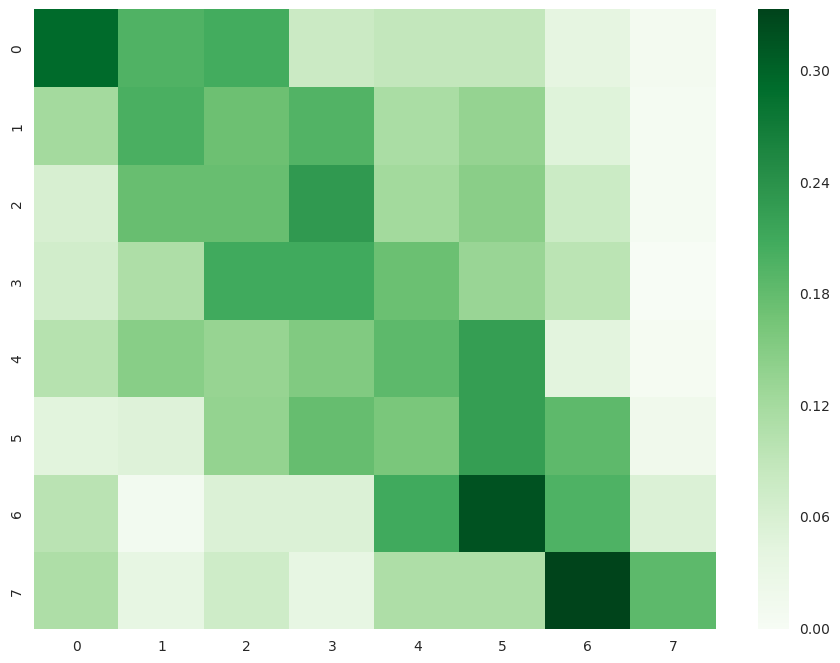

In [330]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Greens')

### 晴→晴

In [331]:
# 晴->晴の場合に切り出し
hoge = np.vstack( [sep_data[:, 0:2],
                  sep_data[:, 1:3],
                  sep_data[:, 2:4],
                  sep_data[:, 3:5],
                  sep_data[:, 7:9],
                  sep_data[:, 8:],
                  oct_data[:, 0:2],
                  oct_data[:, 1:3],
                  oct_data[:, 6:8],
                  oct_data[:, 7:9],
                  oct_data[:, 8:],
                  nov_data[:, 3:5],
                  nov_data[:, 4:6],
                  nov_data[:, 5:7]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.4059  0.1551  0.0825  0.1221  0.1254  0.0726  0.033   0.0033]
 [ 0.1499  0.2507  0.218   0.1635  0.1035  0.0654  0.0436  0.0054]
 [ 0.0917  0.1659  0.2424  0.2118  0.1485  0.107   0.0306  0.0022]
 [ 0.0592  0.0992  0.2042  0.2615  0.1947  0.124   0.0496  0.0076]
 [ 0.0588  0.0854  0.1063  0.2068  0.2543  0.1879  0.093   0.0076]
 [ 0.0568  0.072   0.0833  0.1269  0.1913  0.3277  0.1307  0.0114]
 [ 0.0463  0.0347  0.0502  0.0888  0.1158  0.2857  0.305   0.0734]
 [ 0.0222  0.0444  0.0222  0.0444  0.0444  0.1111  0.3333  0.3778]]


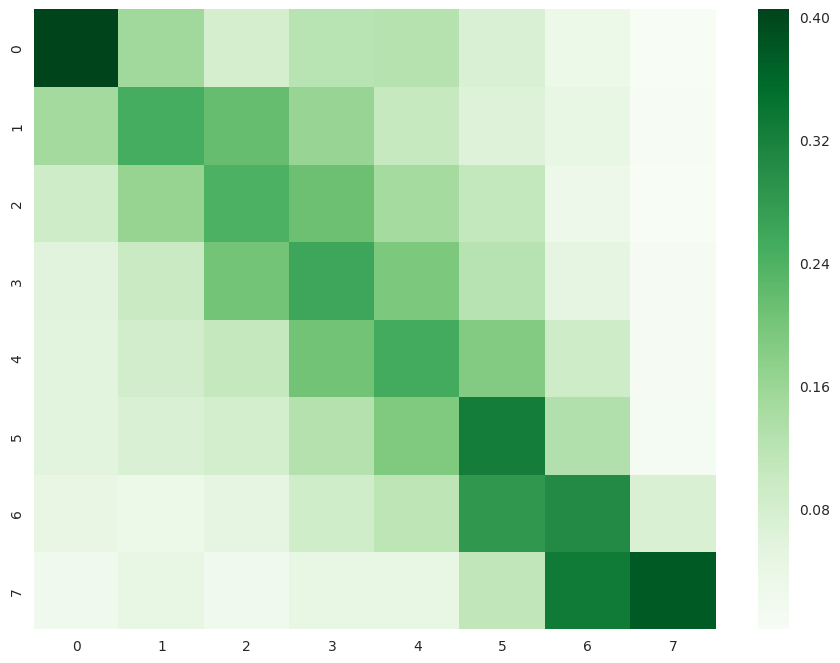

In [332]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Greens')

### 晴→雨

In [333]:
# 晴->雨の場合に切り出し
hoge = np.vstack( [sep_data[:, 4:6],
                  oct_data[:, 2:4],
                  oct_data[:, 4:6],
                  nov_data[:, 0:2],
                  nov_data[:, 6:8]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3812  0.2062  0.1625  0.0938  0.075   0.0438  0.0312  0.0062]
 [ 0.1824  0.2838  0.2162  0.1149  0.0878  0.0676  0.0473  0.    ]
 [ 0.1548  0.2083  0.2143  0.1845  0.1488  0.0655  0.0238  0.    ]
 [ 0.1682  0.1308  0.1495  0.2523  0.1495  0.0888  0.0514  0.0093]
 [ 0.1154  0.1442  0.1683  0.1683  0.1875  0.1394  0.0721  0.0048]
 [ 0.0421  0.1075  0.1542  0.1168  0.1776  0.3271  0.0748  0.    ]
 [ 0.0863  0.0647  0.0863  0.1079  0.1079  0.223   0.2446  0.0791]
 [ 0.0333  0.0667  0.0333  0.0333  0.1     0.1667  0.2     0.3667]]


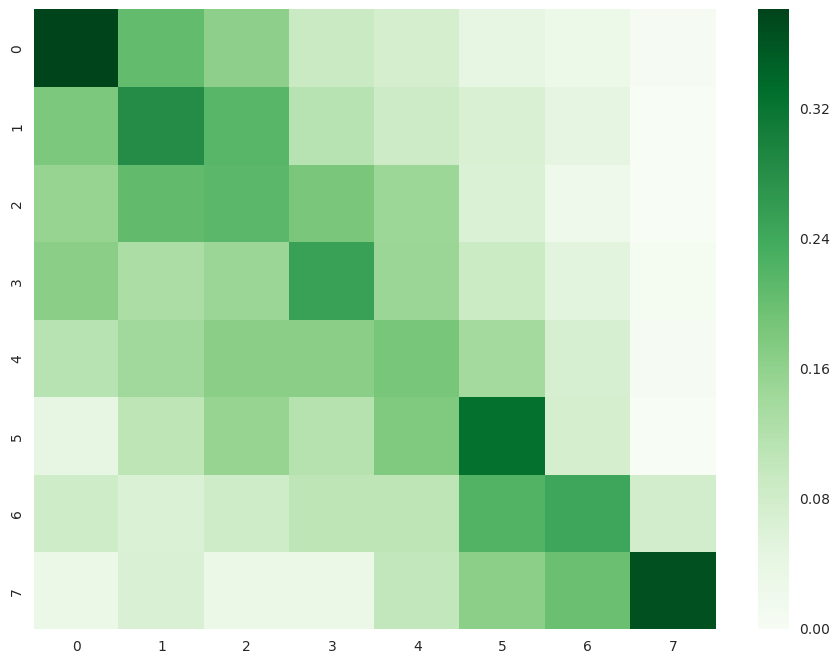

In [334]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Greens')

### 雨→雨

In [335]:
# 雨->雨の場合に切り出し
hoge = np.vstack( [sep_data[:, 5:7],
                  nov_data[:, 1:3],
                  nov_data[:, 7:9],
                  nov_data[:, 8:]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3532  0.1692  0.1343  0.1144  0.1194  0.0697  0.0299  0.01  ]
 [ 0.1556  0.2111  0.1556  0.1833  0.1278  0.1222  0.0222  0.0222]
 [ 0.0934  0.1703  0.1703  0.2253  0.1264  0.1593  0.044   0.011 ]
 [ 0.0854  0.1524  0.1646  0.2073  0.2073  0.1341  0.0366  0.0122]
 [ 0.0515  0.1471  0.1544  0.1618  0.1912  0.1765  0.1103  0.0074]
 [ 0.0763  0.0916  0.0916  0.1298  0.1679  0.2748  0.1527  0.0153]
 [ 0.0548  0.137   0.0548  0.0959  0.137   0.2055  0.2466  0.0685]
 [ 0.      0.0714  0.      0.      0.1429  0.0714  0.4286  0.2857]]


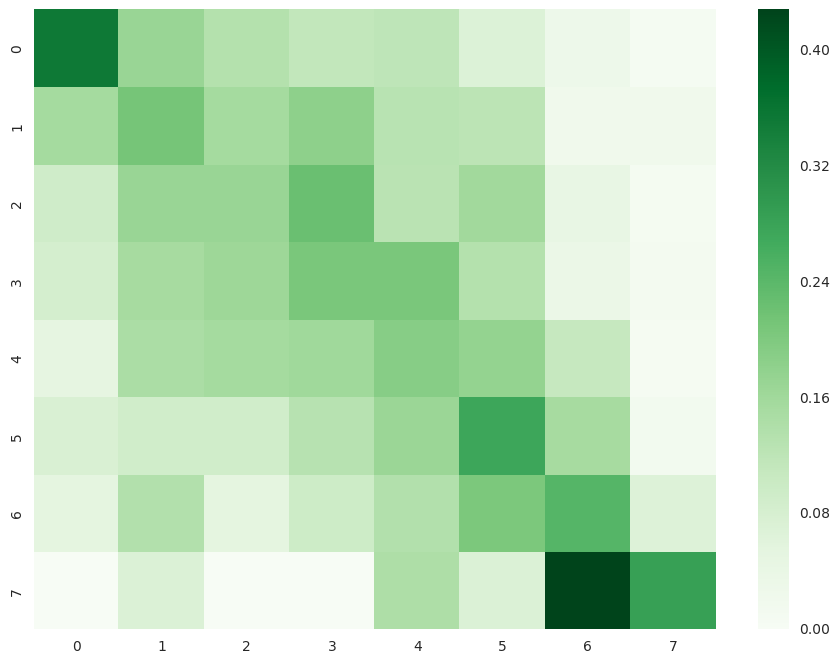

In [336]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Greens')

# 曜日について解析

In [137]:
# 10日間の平日休日のリスト 平日が0、休日が1
DAY = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1], 
                [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 
                [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]])

### 休→休

In [337]:
N=8
# 休->休の場合に切り出し
hoge = np.vstack( [sep_data[:, 1:3],
                  sep_data[:, 8:],
                  oct_data[:, 4:6],
                  oct_data[:, 5:7],
                  oct_data[:, 6:8],
                  nov_data[:, 7:9]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.335   0.1576  0.1379  0.1084  0.133   0.0887  0.0296  0.0099]
 [ 0.1751  0.2203  0.1751  0.1695  0.1186  0.0847  0.0452  0.0113]
 [ 0.1307  0.1364  0.1875  0.2159  0.142   0.1307  0.0568  0.    ]
 [ 0.0794  0.1323  0.2328  0.1958  0.2011  0.1111  0.0317  0.0159]
 [ 0.1055  0.1256  0.1206  0.1608  0.196   0.1558  0.1256  0.0101]
 [ 0.0676  0.1126  0.1261  0.1171  0.1802  0.2523  0.1351  0.009 ]
 [ 0.0784  0.0784  0.0654  0.098   0.1307  0.2288  0.2614  0.0588]
 [ 0.0667  0.0333  0.      0.0667  0.1667  0.0333  0.3333  0.3   ]]


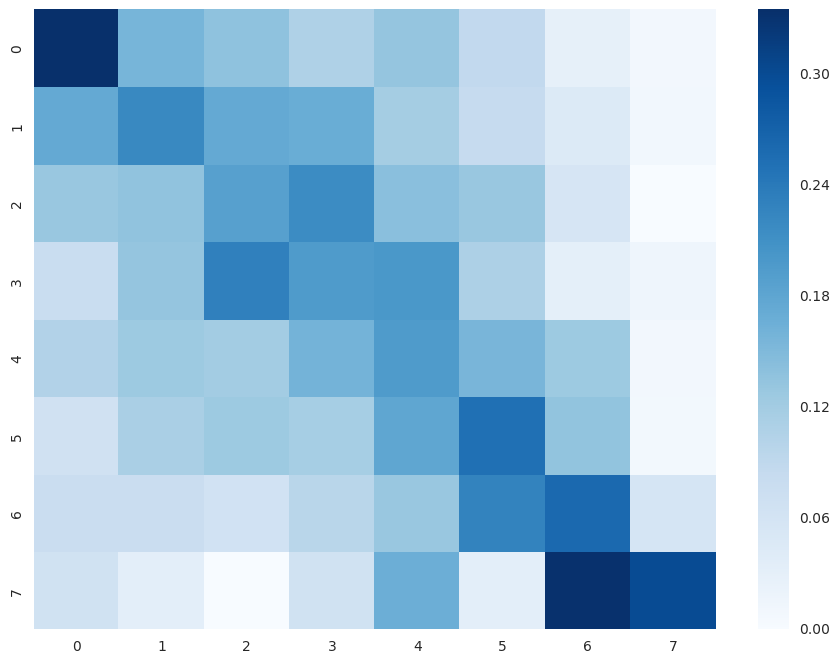

In [338]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Blues')

### 休→平

In [339]:
# 休->平の場合に切り出し
hoge = np.vstack( [sep_data[:, 2:4],
                  oct_data[:, 7:9],
                  nov_data[:, 0:2],
                  nov_data[:, 2:4],
                  nov_data[:, 7:9]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3249  0.2081  0.1675  0.1066  0.1371  0.0406  0.0102  0.0051]
 [ 0.1411  0.2393  0.2883  0.1472  0.092   0.0675  0.0245  0.    ]
 [ 0.087   0.1925  0.1863  0.2795  0.1242  0.1118  0.0186  0.    ]
 [ 0.09    0.125   0.21    0.28    0.135   0.11    0.05    0.    ]
 [ 0.0773  0.1256  0.1159  0.1932  0.2174  0.2029  0.0676  0.    ]
 [ 0.0685  0.1187  0.1279  0.1553  0.1918  0.2374  0.0913  0.0091]
 [ 0.0818  0.0818  0.1132  0.1006  0.1321  0.2767  0.1698  0.044 ]
 [ 0.0882  0.1176  0.0588  0.0294  0.1471  0.1765  0.2647  0.1176]]


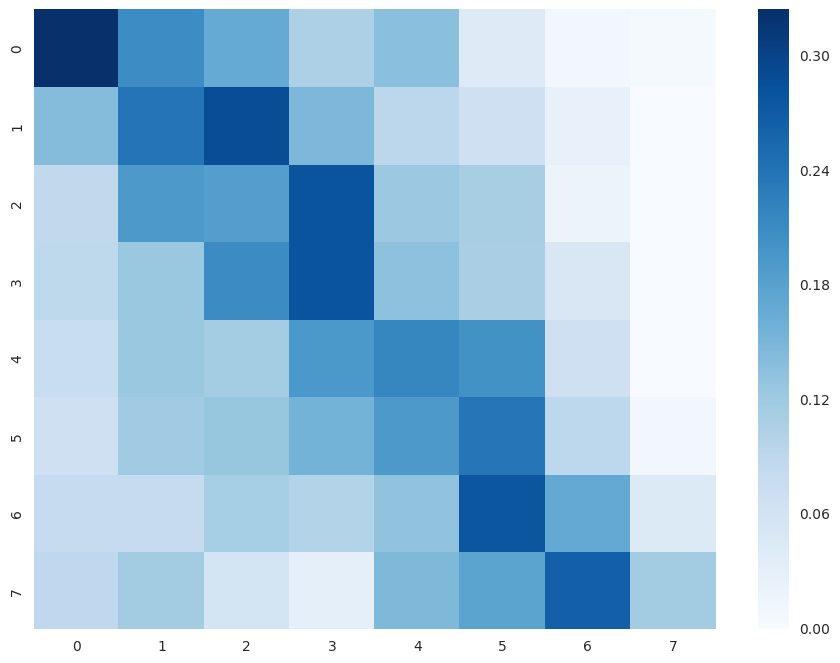

In [340]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Blues')

### 平→休

In [341]:
# 平->休の場合に切り出し
hoge = np.vstack( [sep_data[:, 0:2],
                  sep_data[:, 7:9],
                  oct_data[:, 3:5],
                  nov_data[:, 1:3],
                  nov_data[:, 6:8]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.3664  0.145   0.145   0.084   0.1145  0.0611  0.0687  0.0153]
 [ 0.1125  0.1812  0.1312  0.1625  0.1     0.2     0.0875  0.025 ]
 [ 0.1117  0.1675  0.1168  0.1929  0.1574  0.1827  0.0609  0.0102]
 [ 0.1675  0.0985  0.0985  0.1872  0.1872  0.1527  0.1034  0.0049]
 [ 0.0989  0.1319  0.1648  0.1374  0.1593  0.1484  0.1374  0.022 ]
 [ 0.0303  0.0545  0.103   0.1455  0.1515  0.3212  0.1939  0.    ]
 [ 0.1348  0.0449  0.0112  0.0562  0.1685  0.2472  0.2584  0.0787]
 [ 0.      0.      0.0455  0.      0.0455  0.1818  0.4091  0.3182]]


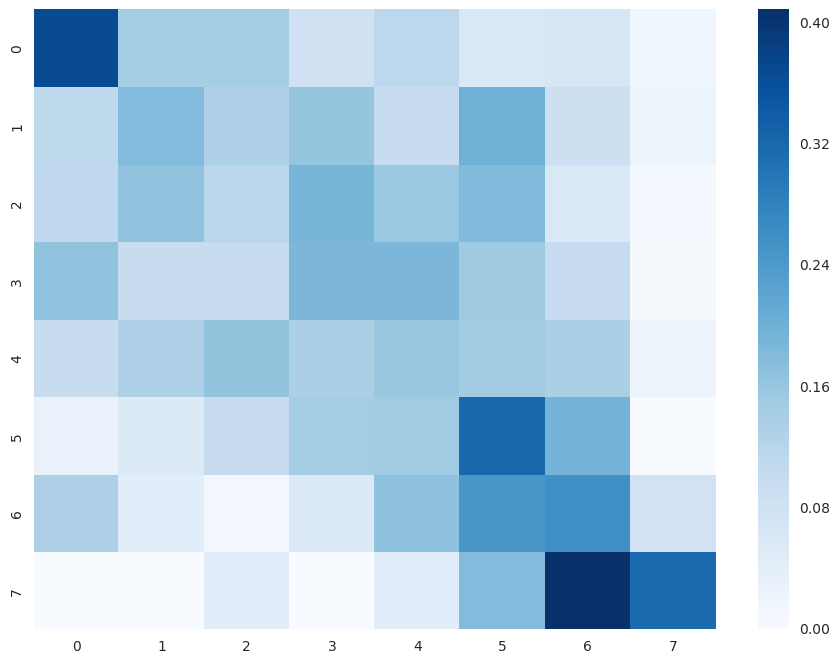

In [342]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Blues')

### 平→平

In [343]:
# 平->平の場合に切り出し
hoge = np.vstack( [sep_data[:, 3:5],
                  sep_data[:, 4:6],
                  sep_data[:, 5:7],
                  sep_data[:, 6:8],
                  oct_data[:, 0:2],
                  oct_data[:, 1:3],
                  oct_data[:, 2:4],
                  oct_data[:, 7:9],
                  oct_data[:, 8:],
                  nov_data[:, 3:5],
                  nov_data[:, 4:6],
                  nov_data[:, 8:]] )

# s0->s0に遷移する確率みたいな感じを順番に数える
percent = np.array([[0.0 for i in range(N)] for j in range(N)])
for i in range(N):
    for j in range(N):
        percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(np.count_nonzero( (hoge[:, 0] == i)))
print np.around(percent, 4)

[[ 0.4098  0.2033  0.1148  0.1148  0.0852  0.0525  0.0197  0.    ]
 [ 0.1749  0.2924  0.2037  0.1462  0.107   0.0601  0.0157  0.    ]
 [ 0.0801  0.1808  0.2654  0.2197  0.1373  0.0847  0.0275  0.0046]
 [ 0.0578  0.1071  0.2184  0.2719  0.1884  0.1221  0.0321  0.0021]
 [ 0.048   0.0981  0.1211  0.2109  0.2547  0.2109  0.0564  0.    ]
 [ 0.044   0.0615  0.0813  0.1275  0.1868  0.3692  0.1143  0.0154]
 [ 0.0258  0.0361  0.0464  0.0773  0.1237  0.2938  0.3093  0.0876]
 [ 0.      0.0541  0.027   0.027   0.027   0.1081  0.2973  0.4595]]


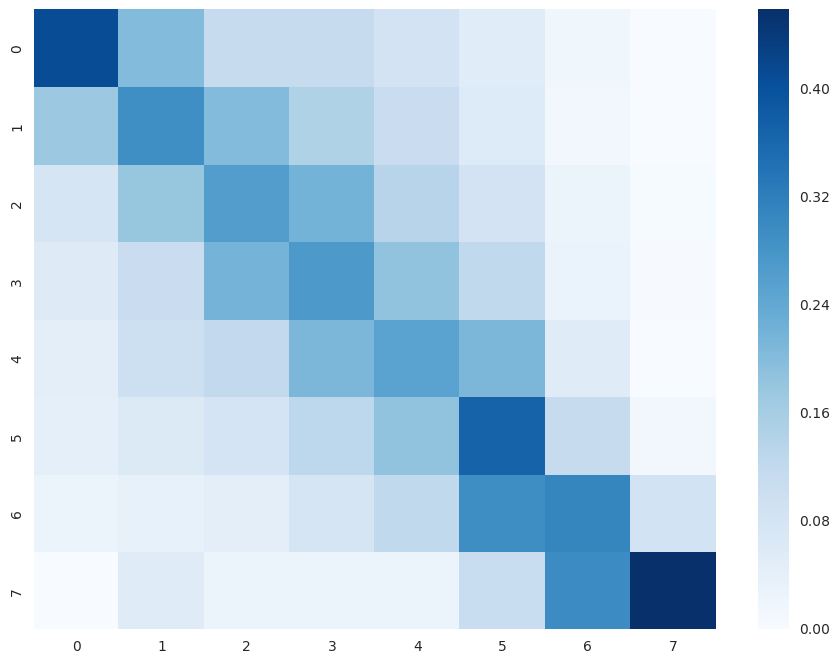

In [344]:
counts_df = pandas.DataFrame(percent)
plt.figure(figsize=(11, 8))
seaborn.heatmap(counts_df, annot=False, fmt='g', cmap='Blues')

# シンプルなことからしなさい！はい！

## 天候の解析から

In [284]:
rain_total = np.array([ [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 42.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.5, 0.0, 5.5, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 15.0, 3.0, 0.0, 0.0, 0.0, 0.0, 9.0, 17.5, 1.5] ])

rain_hour = np.array([ [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 11.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.5, 0.0, 3.5, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 3.0, 1.5, 0.0, 0.0, 0.0, 0.0, 3.0, 11.5, 1.5] ])

In [285]:
data = rain_total.copy()
data.shape = 30, 

# データをクラスタリング
N = 3
codebook, destortion = scipy.cluster.vq.kmeans(data, N, iter=20, thresh=1e-05)
print 'codebook: ', codebook, 'destortion: ', destortion

# ベクトル量子化
# 各データをセントロイドに分類する
code_rain, dist = scipy.cluster.vq.vq(data, codebook)

# クラスタリング結果の確認
print "code: ", np.unique(code)
print "portion of each code: "
for i in xrange(N):
    print "num of [%d]: " % i, np.count_nonzero((code_rain == i))

# 順序尺度化
## 並び替え、インデックスリストを作成する

sorted_codebook = np.sort(codebook)
code_rain, dist = scipy.cluster.vq.vq(data, sorted_codebook)

print "[confirmation] sorted codebook: ", sorted_codebook
print "[confirmation] portion of each ordinal code: "
for i in xrange(N):
    print "num of [%d]: " % i, np.count_nonzero((code_rain == i))

code_rain.shape = (3, 10)
print code_rain

codebook:  [ 42.           0.42307692  13.83333333] destortion:  1.38397435897
code:  [0 1 2]
portion of each code: 
num of [0]:  1
num of [1]:  26
num of [2]:  3
[confirmation] sorted codebook:  [  0.42307692  13.83333333  42.        ]
[confirmation] portion of each ordinal code: 
num of [0]:  26
num of [1]:  3
num of [2]:  1
[[0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 0]]


In [293]:
# percent[i, j] = float(np.count_nonzero( (hoge[:, 0] == i) & (hoge[:, 1] == j) )) / float(len( hoge ))

# 天候クラスタ毎に歩行記録を取り出す
# 天候クラスタ0
pe = sep_code[:, np.where( code_rain[0] == 0 )].copy()
tmp = np.resize(pe[:, 0, :], (127*9, ))
pe = oct_code[:, np.where( code_rain[1] == 0 )].copy()
cl_0 = np.hstack( [tmp, np.resize(pe[:, 0, :], (259*10, ))] )
pr = nov_code[:, np.where( code_rain[2] == 0 )].copy()
cl_0 = np.hstack( [cl_0, np.resize(pe[:, 0, :], (318*7, ))] )

# 天候クラスタ1
pe = nov_code[:, np.where( code_rain[2] == 1 )].copy()
cl_1 = np.resize(pe[:, 0, :], (318*7, ))

# 天候クラスタ2
pe = sep_code[:, np.where( code_rain[0] == 2 )].copy()
cl_2 = np.resize(pe[:, 0, :], (127*9, ))

# 最頻歩行クラスタを出す
from collections import Counter

print 'cluster:0---'
data = Counter(cl_0)
print data.most_common()
print 'cluster:1---'
data = Counter(cl_1)
print data.most_common()
print 'cluster:2---'
data = Counter(cl_2)
print data.most_common()

cluster:0---
[(5, 1052), (4, 1012), (3, 979), (2, 846), (1, 765), (0, 650), (6, 532), (7, 123)]
cluster:1---
[(0, 418), (1, 373), (2, 363), (3, 330), (4, 270), (5, 268), (6, 168), (7, 36)]
cluster:2---
[(1, 306), (0, 225), (2, 207), (3, 153), (4, 117), (5, 117), (6, 18)]


In [295]:
import matplotlib.pylab as plt

[(0, 650), (1, 765), (2, 846), (3, 979), (4, 1012), (5, 1052), (6, 532), (7, 123)]


<Container object of 8 artists>

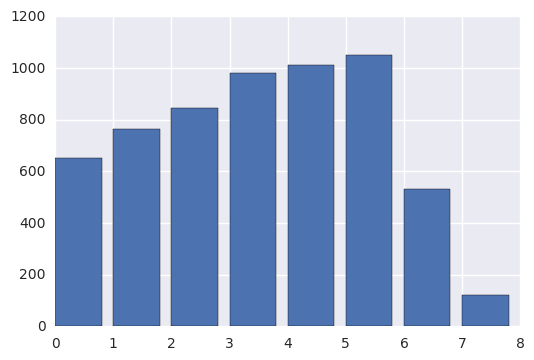

In [326]:
%matplotlib inline

data = [(5, 1052), (4, 1012), (3, 979), (2, 846), (1, 765), (0, 650), (6, 532), (7, 123)]
sorted_data = sorted(data, key=lambda x: x[0])

print sorted_data

plt.bar(
   [x[0] for x in sorted_data],
   [x[1] for x in sorted_data]
)

[(0, 418), (1, 373), (2, 363), (3, 330), (4, 270), (5, 268), (6, 168), (7, 36)]


<Container object of 8 artists>

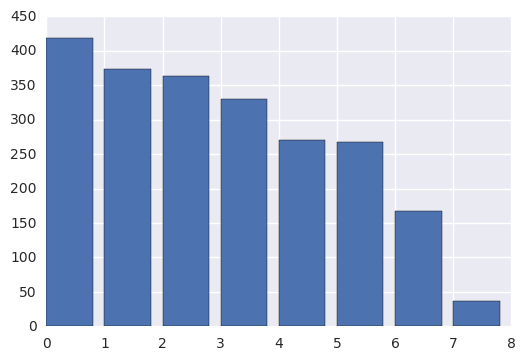

In [327]:
data = [(0, 418), (1, 373), (2, 363), (3, 330), (4, 270), (5, 268), (6, 168), (7, 36)]
sorted_data = sorted(data, key=lambda x: x[0])

print sorted_data

plt.bar(
   [x[0] for x in sorted_data],
   [x[1] for x in sorted_data]
)

[(0, 225), (1, 306), (2, 207), (3, 153), (4, 117), (5, 117), (6, 18)]


<Container object of 7 artists>

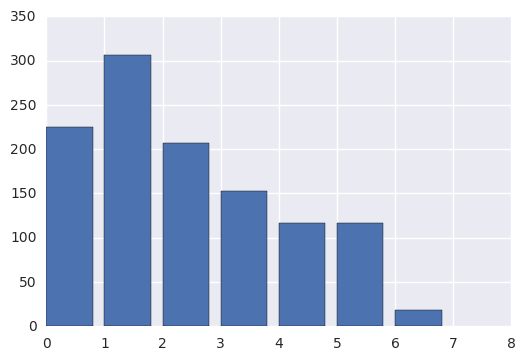

In [328]:
data = [(1, 306), (0, 225), (2, 207), (3, 153), (4, 117), (5, 117), (6, 18)]
sorted_data = sorted(data, key=lambda x: x[0])

print sorted_data

plt.xlim(0, 8)
plt.bar(
   [x[0] for x in sorted_data],
   [x[1] for x in sorted_data]
)

## 休日の解析

In [289]:
# 休日かどうかでデータを取り出す
# 休日クラスタ
pe = sep_code[:, np.where( DAY[0] == 0 )].copy()
tmp = np.resize(pe[:, 0, :], (127*9, ))
pe = oct_code[:, np.where( DAY[1] == 0 )].copy()
cl_0 = np.hstack( [tmp, np.resize(pe[:, 0, :], (259*10, ))] )
pr = nov_code[:, np.where( DAY[2] == 0 )].copy()
cl_0 = np.hstack( [cl_0, np.resize(pe[:, 0, :], (318*7, ))] )

# 平日クラスタ
pe = sep_code[:, np.where( DAY[0] == 1 )].copy()
tmp = np.resize(pe[:, 0, :], (127*9, ))
pe = oct_code[:, np.where( DAY[1] == 1 )].copy()
cl_1 = np.hstack( [tmp, np.resize(pe[:, 0, :], (259*10, ))] )
pr = nov_code[:, np.where( DAY[2] == 1 )].copy()
cl_1 = np.hstack( [cl_0, np.resize(pe[:, 0, :], (318*7, ))] )

# 最頻歩行クラスタを出す
# from collections import Counter

print '休日クラスタ---'
data = Counter(cl_0)
print data.most_common()
print '平日クラスタ---'
data = Counter(cl_1)
print data.most_common()

休日クラスタ---
[(4, 1067), (5, 1024), (3, 1010), (2, 878), (1, 797), (0, 637), (6, 445), (7, 101)]
平日クラスタ---
[(5, 1405), (4, 1388), (3, 1343), (2, 1188), (1, 1081), (0, 926), (6, 696), (7, 158)]


[(0, 637), (1, 797), (2, 878), (3, 1010), (4, 1067), (5, 1024), (6, 445), (7, 101)]


<Container object of 8 artists>

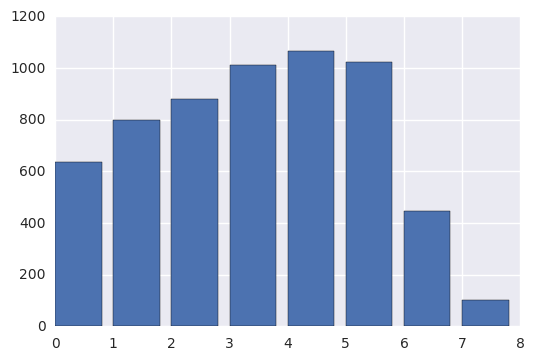

In [299]:
data = [(4, 1067), (5, 1024), (3, 1010), (2, 878), (1, 797), (0, 637), (6, 445), (7, 101)]
sorted_data = sorted(data, key=lambda x: x[0])

print sorted_data

plt.bar(
   [x[0] for x in sorted_data],
   [x[1] for x in sorted_data]
)

[(0, 926), (1, 1081), (2, 1188), (3, 1343), (4, 1388), (5, 1405), (6, 696), (7, 158)]


<Container object of 8 artists>

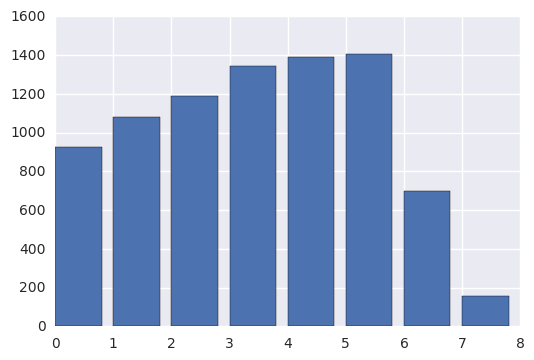

In [300]:
data = [(5, 1405), (4, 1388), (3, 1343), (2, 1188), (1, 1081), (0, 926), (6, 696), (7, 158)]
sorted_data = sorted(data, key=lambda x: x[0])

print sorted_data

plt.bar(
   [x[0] for x in sorted_data],
   [x[1] for x in sorted_data]
)